In [11]:
from create_network import create_network
from lxml import etree
from nltk.tokenize import TweetTokenizer
import string

In [12]:
# Store all sp_tags from a specific scene
tree = etree.parse(r".\Texts\the_duchess_of_malfi.xml")
root = tree.getroot()
tei_namespace = {"tei":"http://www.tei-c.org/ns/1.0"}
act_num = "5"
scene_num = "5"
sp_tags = root.xpath(f"//tei:div[@n={act_num} and @type='act']//tei:div[@n={scene_num} and @type='scene']//tei:sp", namespaces = tei_namespace)

# Store the frequency and the volume (words) of interactions between characters
t = TweetTokenizer()
frequency_dict = {}
volume_dict = {}
current_character = None
previous_character = None
for sp_tag in sp_tags:
    current_character = sp_tag.get("who")[7:].title() # Remove the ID and the hyphen from the "who" attribute value to get only the character's name

    # Fix the First Executioner's name
    if current_character ==  "Executioner" or current_character ==  "Executioneri":
        current_character = "First Executioner"
    
    # Store the volume (words) of interactions passed from the current character to the next character
    # The lines are stored in one or multiple "l" or "p" tags; iterate over the tags to store the lines; ignore "speaker" and "stage" tags
    volume = 0
    linetextlist=sp_tag.xpath(".//text()[not(parent::tei:speaker or parent::tei:stage)]", namespaces=tei_namespace)
    for linetext in linetextlist:
        words = t.tokenize(linetext)
        words = [word for word in words if word not in string.punctuation] # Remove punctuation from words list
        if words:
            volume += len(words)
    if current_character not in volume_dict:
        volume_dict[current_character] = 0
    volume_dict[current_character] += volume

    # Store the frequency of interactions between characters
    if previous_character and previous_character != current_character:
        if previous_character not in frequency_dict:
            frequency_dict[previous_character] = {}
        if current_character in frequency_dict[previous_character]:
            frequency_dict[previous_character][current_character] += 1
        else:
            frequency_dict[previous_character][current_character] = 1
    
    previous_character = current_character

# Sort the dictionary keys
for speaker, responses in frequency_dict.items():
    responses = dict(sorted(responses.items()))
    frequency_dict[speaker] = responses
frequency_dict = dict(sorted(frequency_dict.items()))
volume_dict = dict(sorted(volume_dict.items()))



0
Bosola
{'Cardinal': 9, 'Ferdinand': 2, 'Pescara': 3}


Processing response from Bosola to Cardinal
Bosola-Cardinal: 9
Processing response from Bosola to Ferdinand
Bosola-Ferdinand: 2
Processing response from Bosola to Pescara
Bosola-Pescara: 3

--


1
Cardinal
{'Bosola': 9, 'Ferdinand': 3, 'Grisolan': 1, 'Malateste': 1, 'Pescara': 1, 'Roderigo': 2}


Processing response from Cardinal to Bosola
Cardinal-Bosola: 18
Processing response from Cardinal to Ferdinand
Cardinal-Ferdinand: 3
Processing response from Cardinal to Grisolan
Cardinal-Grisolan: 1
Processing response from Cardinal to Malateste
Cardinal-Malateste: 1
Processing response from Cardinal to Pescara
Cardinal-Pescara: 1
Processing response from Cardinal to Roderigo
Cardinal-Roderigo: 2

--


2
Ferdinand
{'Bosola': 2, 'Cardinal': 3}


Processing response from Ferdinand to Bosola
Ferdinand-Bosola: 4
Processing response from Ferdinand to Cardinal
Ferdinand-Cardinal: 6

--


3
Grisolan
{'Cardinal': 1}


Processing response from

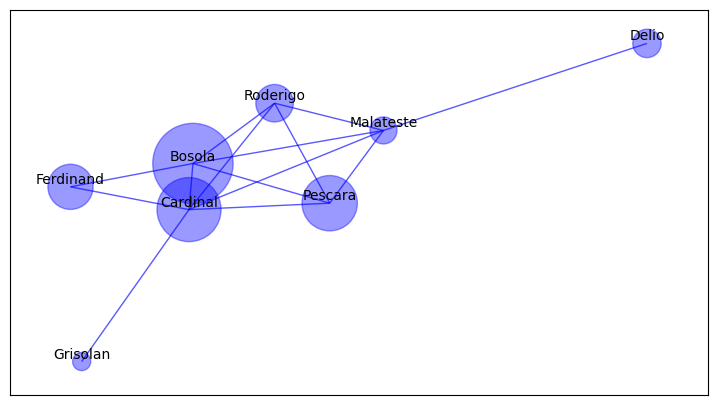

In [13]:
create_network("the_duchess_of_malfi_act_5_scene_5", frequency_dict, volume_dict)

In [14]:
frequency_dict

{'Bosola': {'Cardinal': 9, 'Ferdinand': 2, 'Pescara': 3},
 'Cardinal': {'Bosola': 9,
  'Ferdinand': 3,
  'Grisolan': 1,
  'Malateste': 1,
  'Pescara': 1,
  'Roderigo': 2},
 'Ferdinand': {'Bosola': 2, 'Cardinal': 3},
 'Grisolan': {'Cardinal': 1},
 'Malateste': {'Bosola': 1,
  'Cardinal': 1,
  'Delio': 1,
  'Pescara': 1,
  'Roderigo': 2},
 'Pescara': {'Cardinal': 1, 'Malateste': 3, 'Roderigo': 1},
 'Roderigo': {'Bosola': 2, 'Cardinal': 1, 'Malateste': 2}}

In [15]:
volume_dict

{'Bosola': 335,
 'Cardinal': 213,
 'Delio': 106,
 'Ferdinand': 159,
 'Grisolan': 17,
 'Malateste': 38,
 'Pescara': 73,
 'Roderigo': 42}